In [3]:
import matplotlib.pyplot as plt
import pandas as pd

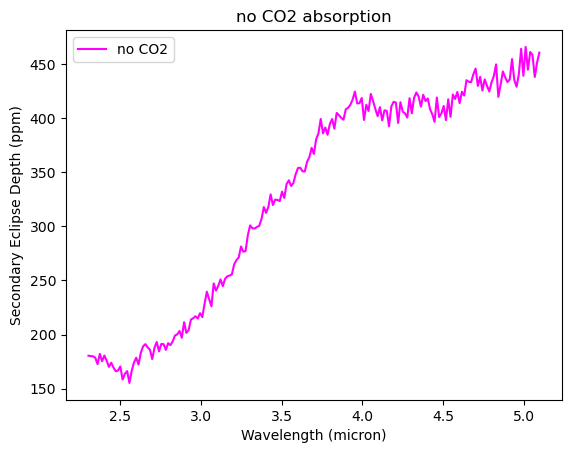

In [4]:
#plotted data
file = pd.read_excel('Model_data_revised.xlsx')
plt.plot(file['wavelengths '], file['no CO2 '], label = 'no CO2', color = 'magenta')
plt.title('no CO2 absorption')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Secondary Eclipse Depth (ppm)')
plt.legend()
plt.show()


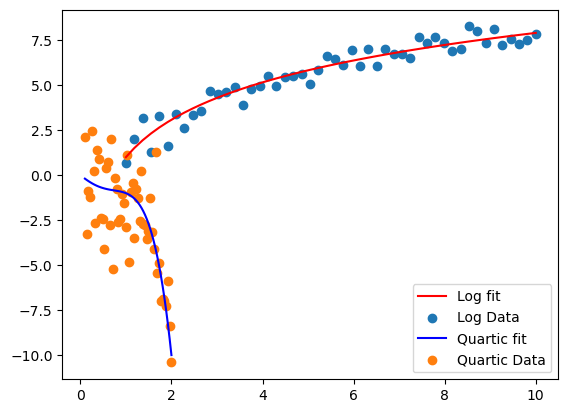

In [64]:
import numpy as np
import scipy.optimize as fit

#curve regression data sample and model

def log_model(x, a, b):
    return a + b*np.log(x)

a = 1
b = 3
n = 50
sigma = 0.5
x = np.linspace(1,10,n)
y = log_model(x,a,b) + sigma*np.random.standard_normal(size=n)

x1 = np.linspace(x.min(), x.max(), 50)
y1 = log_model(x, a, b)


# Polynomial order : 4
# formula: y = ax^4 + bx^3 + cx^2 + dx + e

def quartic(x, coeff):
    return np.polyval(coeff, x2)

coeff = [-1.5, 2, 0.5, -2, 0]
n = 50
sigma = 2
x2 = np.linspace(0.1,2,n)
y2 = quartic(x2, coeff) + sigma*np.random.standard_normal(size=n)

x3 = np.linspace(x2.min(), x2.max(), 50)
y3 = quartic(x2, coeff)

plt.plot(x1, y1, color ='red', label = 'Log fit')
plt.scatter(x, y, label='Log Data')
plt.plot(x3, y3, color ='blue', label = 'Quartic fit')
plt.scatter(x2, y2, label='Quartic Data')
plt.legend()
plt.show()


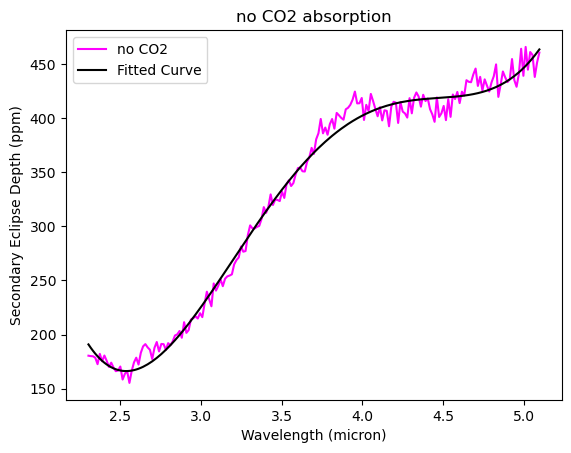

R^2 value: 0.9911561105436137


In [6]:
#Data Fitting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

file = pd.read_excel('Model_data_revised.xlsx')

def quartic(x, *params):
    a, b, c, d, e = params
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

x2 = np.linspace(file['wavelengths '].min(), file['wavelengths '].max(), 199)
y2 = file['no CO2 ']
p0 = [51.255, -786.16, 4395.7, -10474, 9160.3]

plt.plot(file['wavelengths '], file['no CO2 '], label='no CO2', color='magenta')
plt.plot(file['wavelengths '], quartic(x2, *p0), label='Fitted Curve', color='black')
plt.title('no CO2 absorption')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Secondary Eclipse Depth (ppm)')
plt.legend()
plt.show()

#curve fitting
popt, pcov = curve_fit(quartic, x2, y2, p0=p0)

#R^2 value
quartic_fit = quartic(x2, *popt)
r_squared = r2_score(y2, quartic_fit)
print("R^2 value:", r_squared)
